**Pip**

In [ ]:
pip install ucimlrepo

# Wine

In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from typing import Mapping
from sklearn.cluster import KMeans
from collections import Counter

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

X = np.array(X)
y = np.array(y)

# display(y)

# Shape
# print("Shape: ", X.shape)

# Normalização
x2 = X #retorna um array NumPy
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)

X = np.array(X)
y = np.array(y)
y = y.ravel()

folds = 10
results = {}
errors = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

kf = StratifiedKFold(n_splits = folds, shuffle = True)

## 10 conjuntos de dados
X_train = []
y_train = []

X_test = []
y_test = []

for train_index, test_index in kf.split(X,y):
  X_train.append(X[train_index])
  X_test.append(X[test_index])

  y_train.append(y[train_index])
  y_test.append(y[test_index])



mlp_100_relu_scores = []
for i in range(folds):
  mlp = MLPClassifier(max_iter=1000)
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_100_relu_scores.append(acc)

results["mlp_relu_100"] = round(np.mean(mlp_100_relu_scores) * 100)

mlp_100_tanh_scores = []
for i in range(folds):
  mlp = MLPClassifier(max_iter=1000, activation='tanh')
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_100_tanh_scores.append(acc)

results["mlp_tanh_100"] = round(np.mean(mlp_100_tanh_scores) * 100)

mlp_6x4_relu_scores = []
for i in range(folds):
  mlp = MLPClassifier(hidden_layer_sizes=(6,4), max_iter=5000)
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_6x4_relu_scores.append(acc)

results["mlp_relu_6x4"] = round(np.mean(mlp_6x4_relu_scores) * 100)

mlp_scores = []
for i in range(folds):
  mlp = MLPClassifier(hidden_layer_sizes=(6,4), activation='tanh', max_iter=5000)
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_scores.append(acc)

results["mlp_tanh_6x4"] = round(np.mean(mlp_scores) * 100)

# Decision Tree Gini

dtree_scores = []
for i in range(folds):
  dtree = DecisionTreeClassifier()
  dtree = dtree.fit(X_train[i], y_train[i])
  result = dtree.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  dtree_scores.append(acc)

results["dt_gini"] = round(np.mean(dtree_scores) * 100)

# Decision Tree Entropy

dtree_scores = []
for i in range(folds):
  dtree = DecisionTreeClassifier(criterion="entropy")
  dtree = dtree.fit(X_train[i], y_train[i])
  result = dtree.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  dtree_scores.append(acc)

results["dt_entropy"] = round(np.mean(dtree_scores) * 100)

# Knn 5

knn_scores = []
for i in range(folds):
  knn = KNeighborsClassifier(n_neighbors=5)
  knn = knn.fit(X_train[i], y_train[i].ravel())
  result = knn.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  knn_scores.append(acc)

results["knn_5"] = round(np.mean(knn_scores) * 100)

# Knn 10

knn_scores = []
for i in range(folds):
  knn = KNeighborsClassifier(n_neighbors=10)
  knn = knn.fit(X_train[i], y_train[i].ravel())
  result = knn.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  knn_scores.append(acc)

results["knn_10"] = round(np.mean(knn_scores) * 100)

# Kmeans

clusters = wine.data.targets.value_counts().shape[0]

kmeans_scores = []
for i in range(folds):
  model = KMeans(n_clusters = clusters, n_init='auto')
  treino = model.fit(X_train[i])

  # Pegar os labels dos padrões de Treinamento
  labels = treino.labels_

  map_labels = []

  for j in range(clusters):
    map_labels.append([])

  new_y_train = y_train[i]

  for j in range(len(y_train[i])):
    for c in range(clusters):
        if labels[j] == c:
            map_labels[c].append(new_y_train[j])

  # Criar dicionário com os labells a serem mapeados
  mapping = {}

  for j in range(clusters):
    final = Counter(map_labels[j]) # contar a classe que mais aparece
    value = final.most_common(1)[0][0] # retorna a classe com maior frequência
    mapping[j] = value

  result = treino.predict(X_test[i])
  result = [mapping[i] for i in result]

  acc = metrics.accuracy_score(result, y_test[i])

  kmeans_scores.append(acc)


results["kmeans"] = round(np.mean(kmeans_scores) * 100)

display(results)

{'mlp_relu_100': 98,
 'mlp_tanh_100': 98,
 'mlp_relu_6x4': 98,
 'mlp_tanh_6x4': 97,
 'dt_gini': 89,
 'dt_entropy': 94,
 'knn_5': 95,
 'knn_10': 95,
 'kmeans': 95}

Relatório

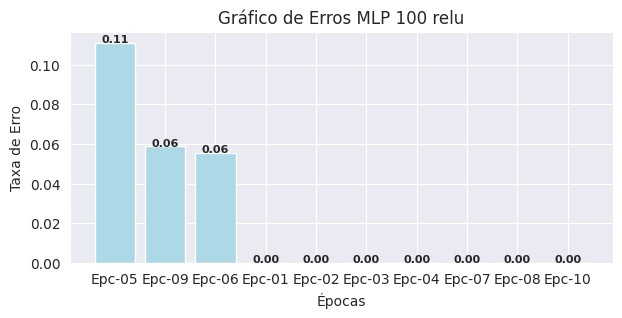

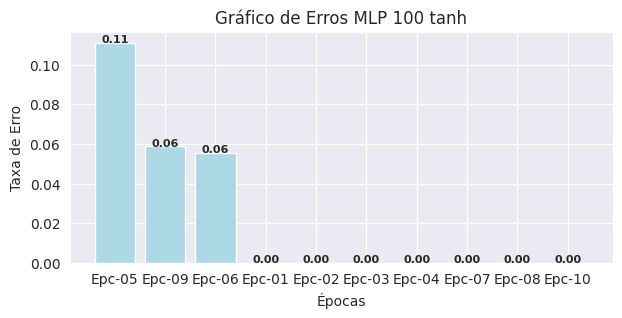

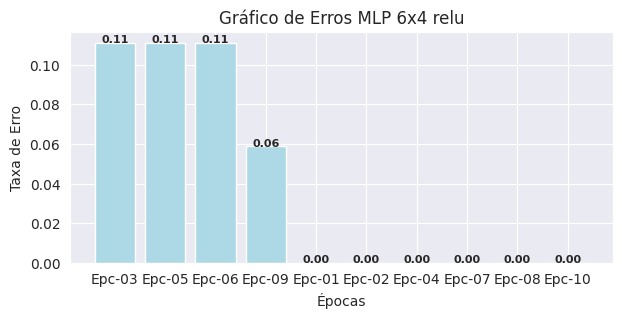

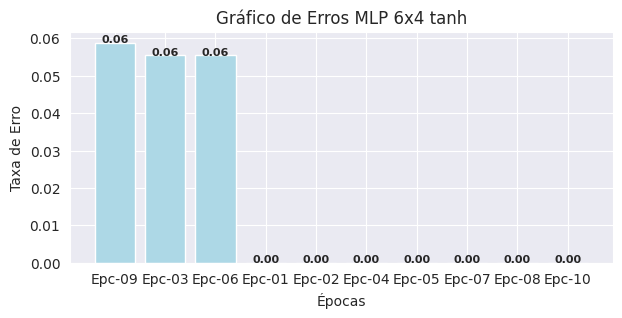

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# MLP 100 relu
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_100_relu_scores:
  err.append(1-i)

relu_100 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_100_relu_scores,
    "Err": err
})

relu_100 = relu_100.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(relu_100["Epc"], relu_100["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 100 relu")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(relu_100)):
    plt.annotate(f"{relu_100['Err'].iloc[i]:.2f}", (relu_100["Epc"].iloc[i], relu_100["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# MLP 100 tanh
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_100_tanh_scores:
  err.append(1-i)

tanh_100 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_100_tanh_scores,
    "Err": err
})

tanh_100 = tanh_100.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(tanh_100["Epc"], tanh_100["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 100 tanh")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(tanh_100)):
    plt.annotate(f"{tanh_100['Err'].iloc[i]:.2f}", (tanh_100["Epc"].iloc[i], tanh_100["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()

# MLP 6x4 relu
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_6x4_relu_scores:
  err.append(1-i)

relu_6x4 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_6x4_relu_scores,
    "Err": err
})

relu_6x4 = relu_6x4.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(relu_6x4["Epc"], relu_6x4["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 6x4 relu")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(relu_6x4)):
    plt.annotate(f"{relu_6x4['Err'].iloc[i]:.2f}", (relu_6x4["Epc"].iloc[i], relu_6x4["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()

# MLP 6x4 tanh
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_scores:
  err.append(1-i)

tanh_6x4 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_scores,
    "Err": err
})

tanh_6x4 = tanh_6x4.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(tanh_6x4["Epc"], tanh_6x4["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 6x4 tanh")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(tanh_6x4)):
    plt.annotate(f"{tanh_6x4['Err'].iloc[i]:.2f}", (tanh_6x4["Epc"].iloc[i], tanh_6x4["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()

Tabela

In [ ]:
algoritmos = []
acc = []
err = []

for i in results:
  algoritmos.append(i)

for j in algoritmos:
  acc.append("{:.2f}%".format(results[j]))
  err.append("{:.2f}%".format(100-results[j]))

# CDataFrame com as Taxas Acurácia/Erros
table = pd.DataFrame({
    "Algorítmos": algoritmos,
    "Taxa de Acerto": acc,
    "Taxa de Erros": err
})

table = table.sort_values("Taxa de Acerto", ascending=False)

display(table)

,Algorítmos,Taxa de Acerto,Taxa de Erros
0,mlp_relu_100,98.00%,2.00%
1,mlp_tanh_100,98.00%,2.00%
2,mlp_relu_6x4,98.00%,2.00%
3,mlp_tanh_6x4,97.00%,3.00%
6,knn_5,95.00%,5.00%
7,knn_10,95.00%,5.00%
8,kmeans,95.00%,5.00%
5,dt_entropy,94.00%,6.00%
4,dt_gini,89.00%,11.00%


# Iris

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

X = np.array(X)
y = np.array(y)

# display(y)

# Shape
# print("Shape: ", X.shape)

# Normalização
x2 = X #retorna um array NumPy
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)

X = np.array(X)
y = np.array(y)
y = y.ravel()

folds = 10
results = {}
errors = {}

kf = StratifiedKFold(n_splits = folds, shuffle = True)

## 10 conjuntos de dados
X_train = []
y_train = []

X_test = []
y_test = []

for train_index, test_index in kf.split(X,y):
  X_train.append(X[train_index])
  X_test.append(X[test_index])

  y_train.append(y[train_index])
  y_test.append(y[test_index])

mlp_100_relu_scores = []
for i in range(folds):
  mlp = MLPClassifier(max_iter=1000)
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_100_relu_scores.append(acc)

results["mlp_relu_100"] = round(np.mean(mlp_100_relu_scores) * 100)

mlp_100_tanh_scores = []
for i in range(folds):
  mlp = MLPClassifier(max_iter=1000, activation='tanh')
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_100_tanh_scores.append(acc)

results["mlp_tanh_100"] = round(np.mean(mlp_100_tanh_scores) * 100)

mlp_6x4_relu_scores = []
for i in range(folds):
  mlp = MLPClassifier(hidden_layer_sizes=(6,4), max_iter=5000)
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_6x4_relu_scores.append(acc)

results["mlp_relu_6x4"] = round(np.mean(mlp_6x4_relu_scores) * 100)

mlp_scores = []
for i in range(folds):
  mlp = MLPClassifier(hidden_layer_sizes=(6,4), activation='tanh', max_iter=5000)
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_scores.append(acc)

results["mlp_tanh_6x4"] = round(np.mean(mlp_scores) * 100)

# Decision Tree Gini

dtree_scores = []
for i in range(folds):
  dtree = DecisionTreeClassifier()
  dtree = dtree.fit(X_train[i], y_train[i])
  result = dtree.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  dtree_scores.append(acc)

results["dt_gini"] = round(np.mean(dtree_scores) * 100)

# Decision Tree Entropy

dtree_scores = []
for i in range(folds):
  dtree = DecisionTreeClassifier(criterion="entropy")
  dtree = dtree.fit(X_train[i], y_train[i])
  result = dtree.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  dtree_scores.append(acc)

results["dt_entropy"] = round(np.mean(dtree_scores) * 100)

# Knn 5

knn_scores = []
for i in range(folds):
  knn = KNeighborsClassifier(n_neighbors=5)
  knn = knn.fit(X_train[i], y_train[i].ravel())
  result = knn.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  knn_scores.append(acc)

results["knn_5"] = round(np.mean(knn_scores) * 100)

# Knn 10

knn_scores = []
for i in range(folds):
  knn = KNeighborsClassifier(n_neighbors=10)
  knn = knn.fit(X_train[i], y_train[i].ravel())
  result = knn.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  knn_scores.append(acc)

results["knn_10"] = round(np.mean(knn_scores) * 100)

# Kmeans

clusters = iris.data.targets.value_counts().shape[0]

kmeans_scores = []
for i in range(folds):
  model = KMeans(n_clusters = clusters, n_init='auto')
  treino = model.fit(X_train[i])

  # Pegar os labels dos padrões de Treinamento
  labels = treino.labels_

  map_labels = []

  for j in range(clusters):
    map_labels.append([])

  new_y_train = y_train[i]

  for j in range(len(y_train[i])):
    for c in range(clusters):
        if labels[j] == c:
            map_labels[c].append(new_y_train[j])

  # Criar dicionário com os labells a serem mapeados
  mapping = {}

  for j in range(clusters):
    final = Counter(map_labels[j]) # contar a classe que mais aparece
    value = final.most_common(1)[0][0] # retorna a classe com maior frequência
    mapping[j] = value

  result = treino.predict(X_test[i])
  result = [mapping[i] for i in result]

  acc = metrics.accuracy_score(result, y_test[i])

  kmeans_scores.append(acc)


results["kmeans"] = round(np.mean(kmeans_scores) * 100)

display(results)


{'mlp_relu_100': 97,
 'mlp_tanh_100': 97,
 'mlp_relu_6x4': 91,
 'mlp_tanh_6x4': 95,
 'dt_gini': 95,
 'dt_entropy': 95,
 'knn_5': 95,
 'knn_10': 95,
 'kmeans': 87}

Relatório

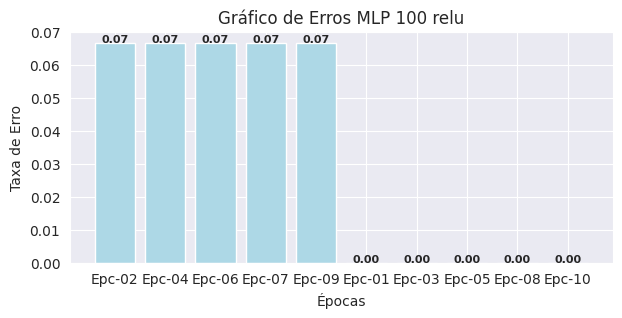

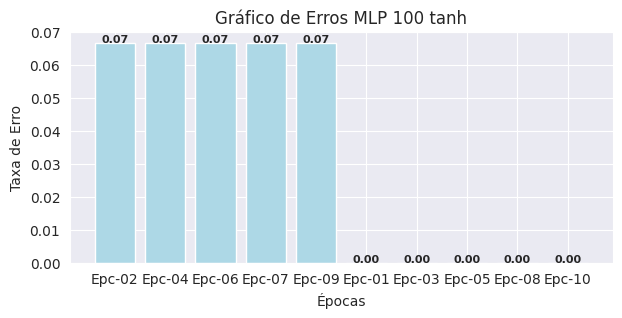

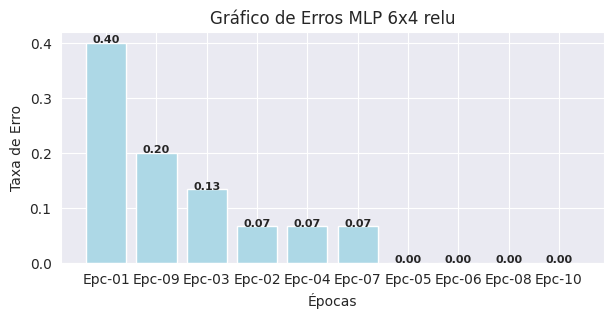

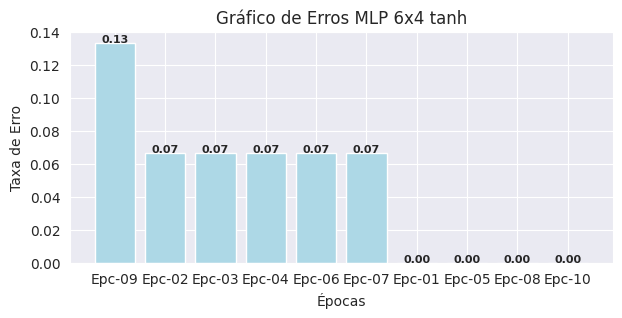

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# MLP 100 relu
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_100_relu_scores:
  err.append(1-i)

relu_100 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_100_relu_scores,
    "Err": err
})

relu_100 = relu_100.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(relu_100["Epc"], relu_100["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 100 relu")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(relu_100)):
    plt.annotate(f"{relu_100['Err'].iloc[i]:.2f}", (relu_100["Epc"].iloc[i], relu_100["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# MLP 100 tanh
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_100_tanh_scores:
  err.append(1-i)

tanh_100 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_100_tanh_scores,
    "Err": err
})

tanh_100 = tanh_100.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(tanh_100["Epc"], tanh_100["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 100 tanh")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(tanh_100)):
    plt.annotate(f"{tanh_100['Err'].iloc[i]:.2f}", (tanh_100["Epc"].iloc[i], tanh_100["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()

# MLP 6x4 relu
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_6x4_relu_scores:
  err.append(1-i)

relu_6x4 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_6x4_relu_scores,
    "Err": err
})

relu_6x4 = relu_6x4.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(relu_6x4["Epc"], relu_6x4["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 6x4 relu")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(relu_6x4)):
    plt.annotate(f"{relu_6x4['Err'].iloc[i]:.2f}", (relu_6x4["Epc"].iloc[i], relu_6x4["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()

# MLP 6x4 tanh
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_scores:
  err.append(1-i)

tanh_6x4 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_scores,
    "Err": err
})

tanh_6x4 = tanh_6x4.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(tanh_6x4["Epc"], tanh_6x4["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 6x4 tanh")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(tanh_6x4)):
    plt.annotate(f"{tanh_6x4['Err'].iloc[i]:.2f}", (tanh_6x4["Epc"].iloc[i], tanh_6x4["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()

Tabela

In [ ]:
algoritmos = []
acc = []
err = []

for i in results:
  algoritmos.append(i)

for j in algoritmos:
  acc.append("{:.2f}%".format(results[j]))
  err.append("{:.2f}%".format(100-results[j]))

# CDataFrame com as Taxas Acurácia/Erros
table = pd.DataFrame({
    "Algorítmos": algoritmos,
    "Taxa de Acerto": acc,
    "Taxa de Erros": err
})

table = table.sort_values("Taxa de Acerto", ascending=False)

display(table)

,Algorítmos,Taxa de Acerto,Taxa de Erros
0,mlp_relu_100,97.00%,3.00%
1,mlp_tanh_100,97.00%,3.00%
3,mlp_tanh_6x4,95.00%,5.00%
4,dt_gini,95.00%,5.00%
5,dt_entropy,95.00%,5.00%
6,knn_5,95.00%,5.00%
7,knn_10,95.00%,5.00%
2,mlp_relu_6x4,91.00%,9.00%
8,kmeans,87.00%,13.00%


# Glass Identification

In [ ]:
from ucimlrepo import fetch_ucirepo
from collections import Counter
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from typing import Mapping
from sklearn.cluster import KMeans
from collections import Counter

# fetch dataset
glass_identification = fetch_ucirepo(id=42)

# data (as pandas dataframes)
X = glass_identification.data.features
y = glass_identification.data.targets


url ="https://archive.ics.uci.edu/static/public/42/data.csv"

df = pd.read_csv(url, header=0)

y = df['Type_of_glass']
x = df.drop('Type_of_glass', axis=1)

y = preprocessing.LabelEncoder().fit_transform(y)

# Normalização
x2 = X #retorna um array NumPy
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)

X = np.array(X)
y = y.ravel()

folds = 10
results = {}

kf = StratifiedKFold(n_splits = folds, shuffle = True)

## 10 conjuntos de dados
X_train = []
y_train = []

X_test = []
y_test = []

for train_index, test_index in kf.split(X,y):
  X_train.append(X[train_index])
  X_test.append(X[test_index])

  y_train.append(y[train_index])
  y_test.append(y[test_index])


mlp_100_relu_scores = []
for i in range(folds):
  mlp = MLPClassifier(max_iter=1000)
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_100_relu_scores.append(acc)

results["mlp_relu_100"] = round(np.mean(mlp_100_relu_scores) * 100)

mlp_100_tanh_scores = []
for i in range(folds):
  mlp = MLPClassifier(max_iter=1000, activation='tanh')
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_100_tanh_scores.append(acc)

results["mlp_tanh_100"] = round(np.mean(mlp_100_tanh_scores) * 100)

mlp_6x4_relu_scores = []
for i in range(folds):
  mlp = MLPClassifier(hidden_layer_sizes=(6,4), max_iter=5000)
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_6x4_relu_scores.append(acc)

results["mlp_relu_6x4"] = round(np.mean(mlp_6x4_relu_scores) * 100)

mlp_scores = []
for i in range(folds):
  mlp = MLPClassifier(hidden_layer_sizes=(6,4), activation='tanh', max_iter=5000)
  mlp = mlp.fit(X_train[i], y_train[i].ravel())
  result = mlp.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  mlp_scores.append(acc)

results["mlp_tanh_6x4"] = round(np.mean(mlp_scores) * 100)

# Decision Tree Gini

dtree_scores = []
for i in range(folds):
  dtree = DecisionTreeClassifier()
  dtree = dtree.fit(X_train[i], y_train[i])
  result = dtree.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  dtree_scores.append(acc)

results["dt_gini"] = round(np.mean(dtree_scores) * 100)

# Decision Tree Entropy

dtree_scores = []
for i in range(folds):
  dtree = DecisionTreeClassifier(criterion="entropy")
  dtree = dtree.fit(X_train[i], y_train[i])
  result = dtree.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  dtree_scores.append(acc)

results["dt_entropy"] = round(np.mean(dtree_scores) * 100)

# Knn 5

knn_scores = []
for i in range(folds):
  knn = KNeighborsClassifier(n_neighbors=5)
  knn = knn.fit(X_train[i], y_train[i].ravel())
  result = knn.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  knn_scores.append(acc)

results["knn_5"] = round(np.mean(knn_scores) * 100)

# Knn 10

knn_scores = []
for i in range(folds):
  knn = KNeighborsClassifier(n_neighbors=10)
  knn = knn.fit(X_train[i], y_train[i].ravel())
  result = knn.predict(X_test[i])

  acc = metrics.accuracy_score(result, y_test[i])

  knn_scores.append(acc)

results["knn_10"] = round(np.mean(knn_scores) * 100)

# Kmeans

clusters = glass_identification.data.targets.value_counts().shape[0]

kmeans_scores = []
for i in range(folds):
  model = KMeans(n_clusters = clusters, n_init='auto')
  treino = model.fit(X_train[i])

  # Pegar os labels dos padrões de Treinamento
  labels = treino.labels_

  map_labels = []

  for j in range(clusters):
    map_labels.append([])

  new_y_train = y_train[i]

  for j in range(len(y_train[i])):
    for c in range(clusters):
        if labels[j] == c:
            map_labels[c].append(new_y_train[j])

  # Criar dicionário com os labells a serem mapeados
  mapping = {}

  for j in range(clusters):
    final = Counter(map_labels[j]) # contar a classe que mais aparece
    value = final.most_common(1)[0][0] # retorna a classe com maior frequência
    mapping[j] = value

  result = treino.predict(X_test[i])
  result = [mapping[i] for i in result]

  acc = metrics.accuracy_score(result, y_test[i])

  kmeans_scores.append(acc)


results["kmeans"] = round(np.mean(kmeans_scores) * 100)

display(results)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stoc

{'mlp_relu_100': 71,
 'mlp_tanh_100': 64,
 'mlp_relu_6x4': 64,
 'mlp_tanh_6x4': 70,
 'dt_gini': 63,
 'dt_entropy': 68,
 'knn_5': 66,
 'knn_10': 61,
 'kmeans': 49}

Relatório

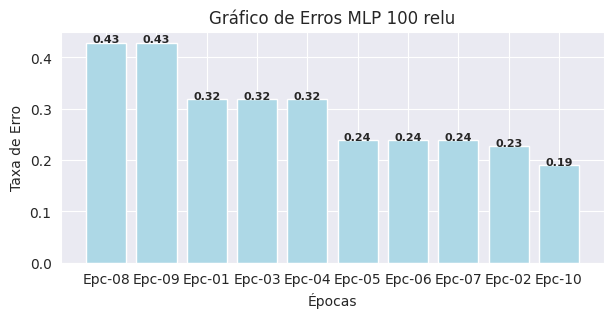

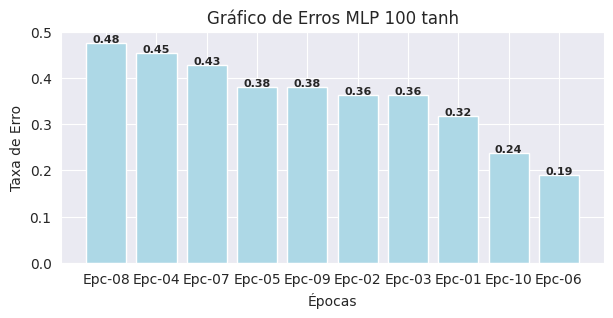

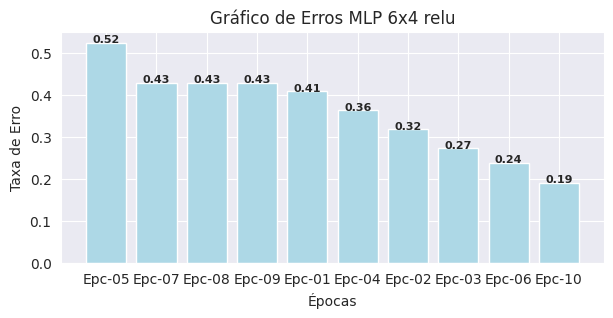

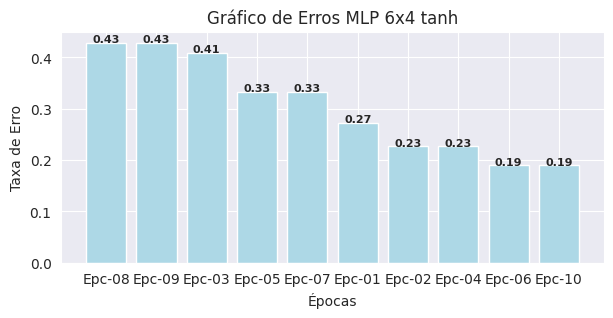

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# MLP 100 relu
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_100_relu_scores:
  err.append(1-i)

relu_100 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_100_relu_scores,
    "Err": err
})

relu_100 = relu_100.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(relu_100["Epc"], relu_100["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 100 relu")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(relu_100)):
    plt.annotate(f"{relu_100['Err'].iloc[i]:.2f}", (relu_100["Epc"].iloc[i], relu_100["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# MLP 100 tanh
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_100_tanh_scores:
  err.append(1-i)

tanh_100 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_100_tanh_scores,
    "Err": err
})

tanh_100 = tanh_100.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(tanh_100["Epc"], tanh_100["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 100 tanh")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(tanh_100)):
    plt.annotate(f"{tanh_100['Err'].iloc[i]:.2f}", (tanh_100["Epc"].iloc[i], tanh_100["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()

# MLP 6x4 relu
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_6x4_relu_scores:
  err.append(1-i)

relu_6x4 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_6x4_relu_scores,
    "Err": err
})

relu_6x4 = relu_6x4.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(relu_6x4["Epc"], relu_6x4["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 6x4 relu")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(relu_6x4)):
    plt.annotate(f"{relu_6x4['Err'].iloc[i]:.2f}", (relu_6x4["Epc"].iloc[i], relu_6x4["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()

# MLP 6x4 tanh
epocas = ["Epc-01", "Epc-02", "Epc-03", "Epc-04", "Epc-05", "Epc-06", "Epc-07", "Epc-08", "Epc-09", "Epc-10"]
err = []

for i in mlp_scores:
  err.append(1-i)

tanh_6x4 = pd.DataFrame({
    "Epc": epocas,
    "Acc": mlp_scores,
    "Err": err
})

tanh_6x4 = tanh_6x4.sort_values("Acc", ascending=True)

plt.figure(figsize=(7, 3))
sns.set_style("darkgrid")
plt.bar(tanh_6x4["Epc"], tanh_6x4["Err"], color="lightblue")
plt.title("Gráfico de Erros MLP 6x4 tanh")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
for i in range(len(tanh_6x4)):
    plt.annotate(f"{tanh_6x4['Err'].iloc[i]:.2f}", (tanh_6x4["Epc"].iloc[i], tanh_6x4["Err"].iloc[i]), ha="center", fontsize=8, weight="bold")
plt.show()

Tabela

In [ ]:
algoritmos = []
acc = []
err = []

for i in results:
  algoritmos.append(i)

for j in algoritmos:
  acc.append("{:.2f}%".format(results[j]))
  err.append("{:.2f}%".format(100-results[j]))

# CDataFrame com as Taxas Acurácia/Erros
table = pd.DataFrame({
    "Algorítmos": algoritmos,
    "Taxa de Acerto": acc,
    "Taxa de Erros": err
})

table = table.sort_values("Taxa de Acerto", ascending=False)

display(table)

,Algorítmos,Taxa de Acerto,Taxa de Erros
0,mlp_relu_100,71.00%,29.00%
3,mlp_tanh_6x4,70.00%,30.00%
5,dt_entropy,68.00%,32.00%
6,knn_5,66.00%,34.00%
1,mlp_tanh_100,64.00%,36.00%
2,mlp_relu_6x4,64.00%,36.00%
4,dt_gini,63.00%,37.00%
7,knn_10,61.00%,39.00%
8,kmeans,49.00%,51.00%
